# Step 1: Reading Maintainence Data

In [488]:
import pandas as pd
import numpy as np
import seaborn as sns

In [489]:
df = pd.read_csv("./ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## 1.1 Removing trivial columns

In [490]:
df = df.drop(['UDI', 'Product ID'], axis=1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## 1.2 Converting Data to Timeseries
### We convert data to hourly time series

In [491]:
df.shape

(10000, 12)

In [492]:
timestamp = pd.date_range(start='2023-01-01', freq='H', periods=df.shape[0])
df.insert(0, 'timestamp', timestamp)
df.set_index(['timestamp'], inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
timestamp,,,,,,,,,,,,
2023-01-01 00:00:00,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2023-01-01 01:00:00,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2023-01-01 02:00:00,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
2023-01-01 03:00:00,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
2023-01-01 04:00:00,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## 1.3 Exploring the dataframe

In [493]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2023-01-01 00:00:00 to 2024-02-21 15:00:00
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1015.6+ KB


In [495]:
df.nunique()

Type                         3
Air temperature [K]         93
Process temperature [K]     82
Rotational speed [rpm]     941
Torque [Nm]                577
Tool wear [min]            246
Machine failure              2
TWF                          2
HDF                          2
PWF                          2
OSF                          2
RNF                          2
dtype: int64

## 1.4 Converting Type column as category
### By default it is text, converting it to category makes it memory effecient

In [496]:
df['Type'] = df['Type'].astype('category')

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2023-01-01 00:00:00 to 2024-02-21 15:00:00
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Type                     10000 non-null  category
 1   Air temperature [K]      10000 non-null  float64 
 2   Process temperature [K]  10000 non-null  float64 
 3   Rotational speed [rpm]   10000 non-null  int64   
 4   Torque [Nm]              10000 non-null  float64 
 5   Tool wear [min]          10000 non-null  int64   
 6   Machine failure          10000 non-null  int64   
 7   TWF                      10000 non-null  int64   
 8   HDF                      10000 non-null  int64   
 9   PWF                      10000 non-null  int64   
 10  OSF                      10000 non-null  int64   
 11  RNF                      10000 non-null  int64   
dtypes: category(1), float64(3), int64(8)
memory usage: 947.4 KB


## 1.5 Checking for null values

In [498]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## 1.6 Feature Selection

### Checking for constant cols

In [499]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [500]:
constant_cols = [col for col in numerical_cols if df[col].std() == 0 or df[col].nunique() == 1]
constant_cols

[]

### Checking for Quasi-Constant columns

In [501]:
# Cols which has very few diff values
quasi_const_cols = []

for col in numerical_cols:
    predominant = df[col].value_counts(normalize=True).sort_values(ascending=False).values[0]
    
    if predominant > 0.998:
        quasi_const_cols.append({'col': col, 'value': predominant})
    
quasi_const_cols    

[{'col': 'RNF', 'value': 0.9981}]

<Axes: >

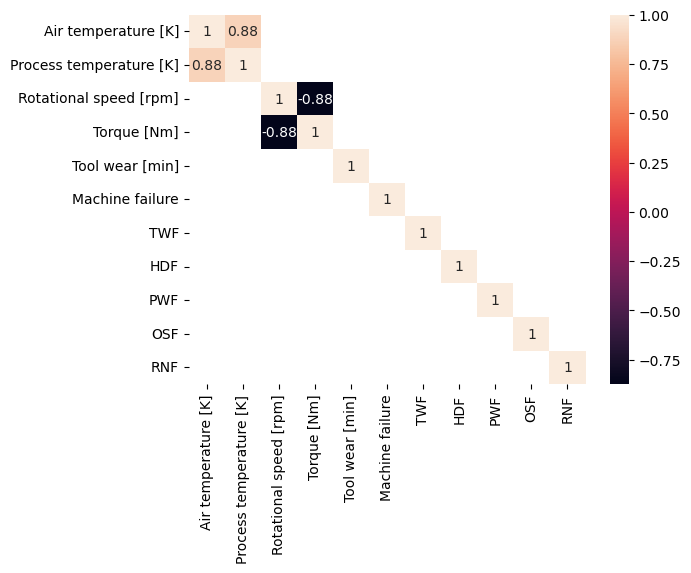

In [502]:
df2 = df.drop(['Type'], axis=1)
correlation = df2.corr()
threshold = 0.8
matrix = correlation.where(abs(correlation) >= threshold).isna()
sns.heatmap(df2.corr(), annot=True, mask=matrix)

# Step 2: Exploratory Data Analysis (EDA)

## 2.1 Plotting histplot of all columns

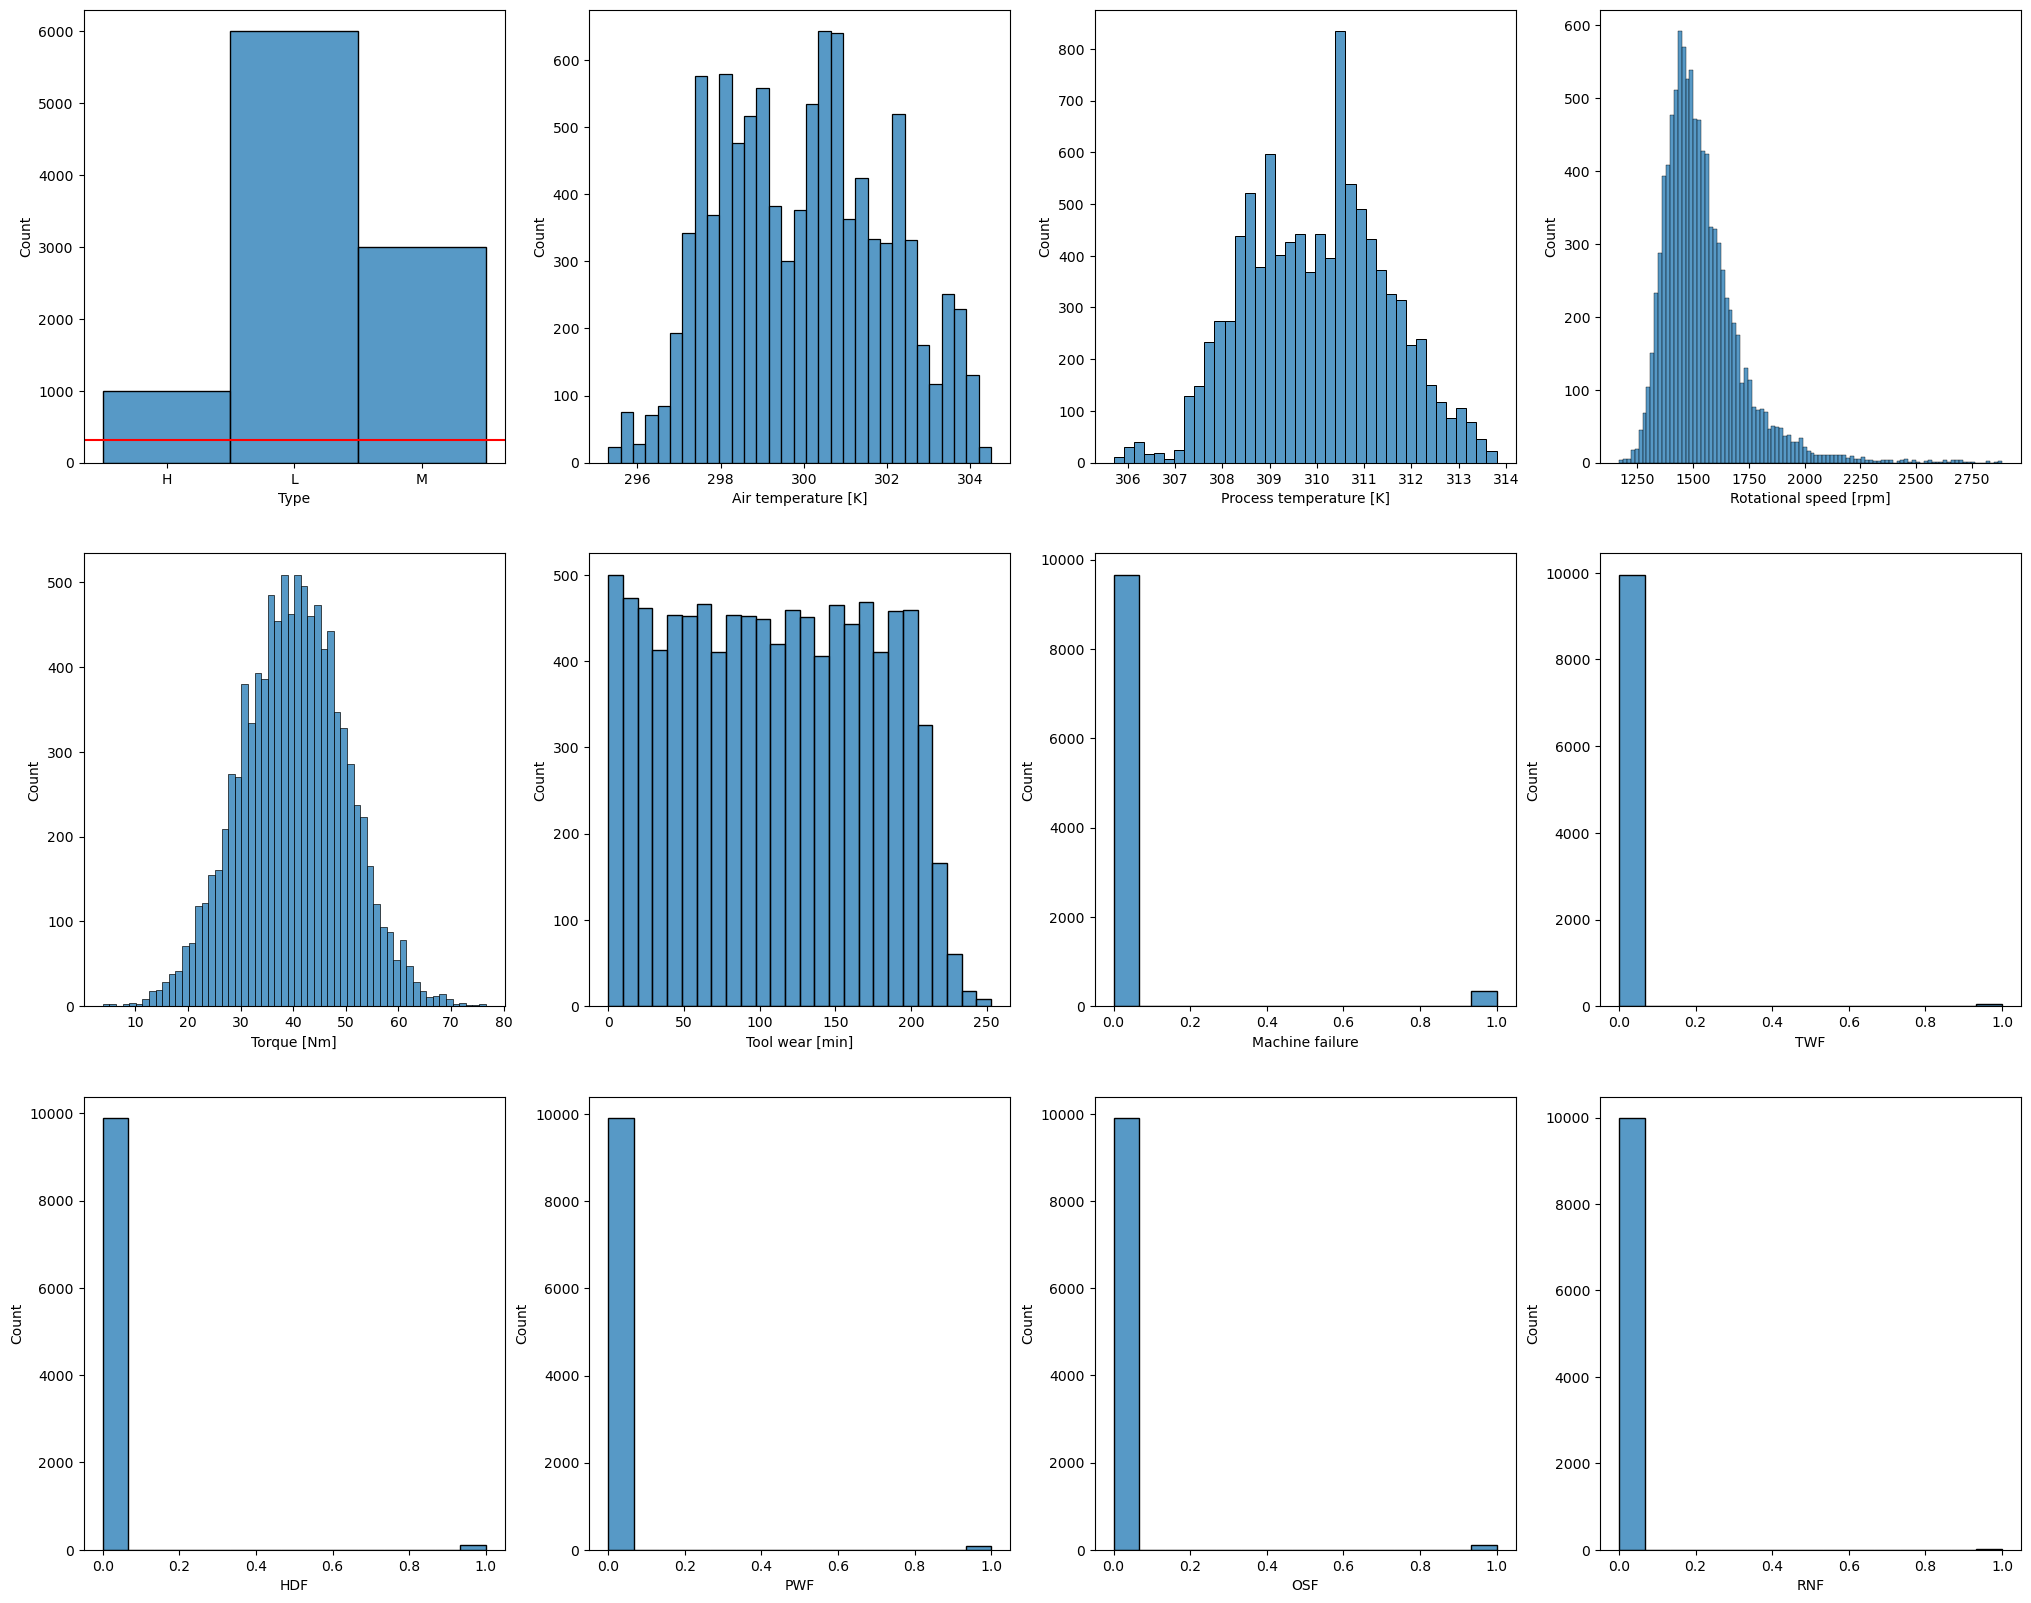

In [503]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4, figsize=(25, 20))
for i, col in enumerate(df.columns):
    sns.histplot(data = df[col], ax=ax[i//4][i%4])
    
    if col not in numerical_cols:
        y_lim = ax[i//4][i%4].get_ylim()[1]
        marker = y_lim * 0.05

        ax[i//4][i%4].axhline(marker, c='red')

In [504]:
# Since number of records for different types of failures are less, we neglect them and only consider "Machine Failure" column
df = df.drop(['HDF', 'RNF', 'OSF', 'PWF', 'TWF'], axis=1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
timestamp,,,,,,,
2023-01-01 00:00:00,M,298.1,308.6,1551,42.8,0,0
2023-01-01 01:00:00,L,298.2,308.7,1408,46.3,3,0
2023-01-01 02:00:00,L,298.1,308.5,1498,49.4,5,0
2023-01-01 03:00:00,L,298.2,308.6,1433,39.5,7,0
2023-01-01 04:00:00,L,298.2,308.7,1408,40.0,9,0


In [505]:
len(df.columns)

7

## 2.2 Box-whisker plot for numeric variables for outlier detection

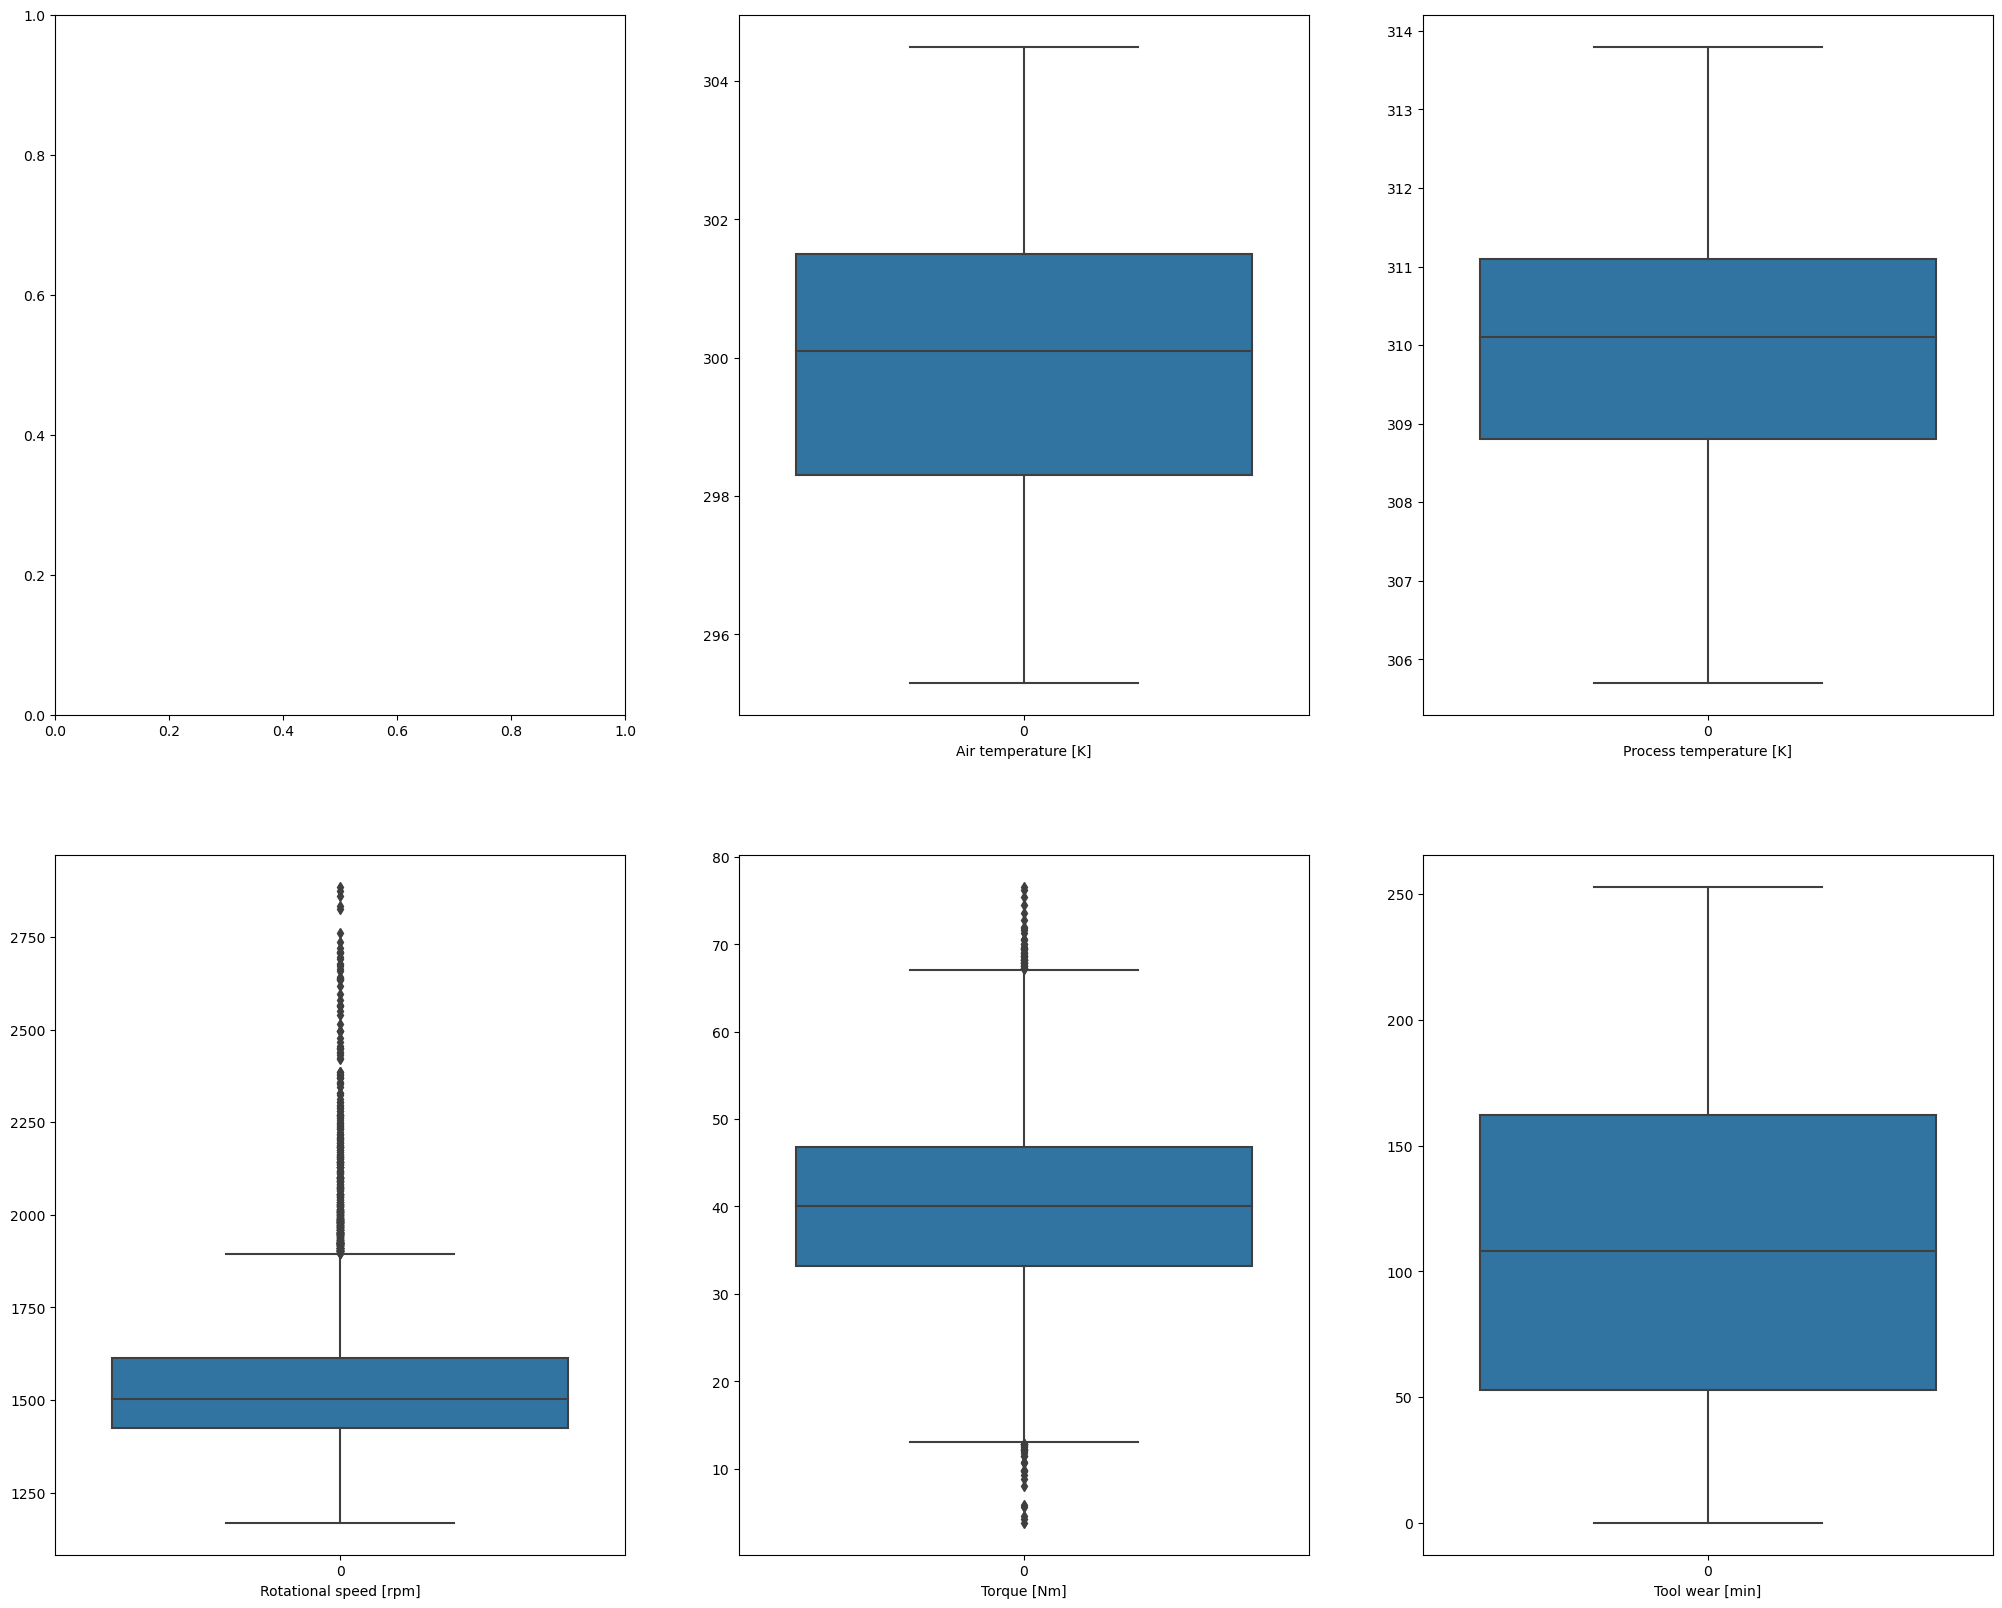

In [506]:
fix, ax = plt.subplots(2, 3, figsize=(25, 20))

for i, col in enumerate(df.columns):
    if col not in ['Type', 'Machine failure']:
        sns.boxplot(df[col], ax=ax[i//3][i%3])
        ax[i//3][i%3].set_xlabel(col)

In [507]:
df[df['Machine failure'] == 1]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
timestamp,,,,,,,
2023-01-03 02:00:00,L,298.9,309.1,2861,4.6,143,1
2023-01-03 21:00:00,L,298.9,309.0,1410,65.7,191,1
2023-01-04 05:00:00,L,298.8,308.9,1455,41.3,208,1
2023-01-07 16:00:00,L,298.4,308.2,1282,60.7,216,1
2023-01-07 17:00:00,L,298.3,308.1,1412,52.3,218,1
...,...,...,...,...,...,...,...
2024-02-11 14:00:00,L,298.6,309.8,2271,16.2,218,1
2024-02-11 20:00:00,L,298.5,309.5,1294,66.7,12,1
2024-02-14 06:00:00,L,298.5,309.4,1360,60.9,187,1


In [508]:
upper_cap = np.percentile(df['Rotational speed [rpm]'], 99)
upper_cap

2188.01

In [509]:
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].map(lambda x: x if x < upper_cap else np.nan)
df['Rotational speed [rpm]']

timestamp
2023-01-01 00:00:00    1551.0
2023-01-01 01:00:00    1408.0
2023-01-01 02:00:00    1498.0
2023-01-01 03:00:00    1433.0
2023-01-01 04:00:00    1408.0
                        ...  
2024-02-21 11:00:00    1604.0
2024-02-21 12:00:00    1632.0
2024-02-21 13:00:00    1645.0
2024-02-21 14:00:00    1408.0
2024-02-21 15:00:00    1500.0
Name: Rotational speed [rpm], Length: 10000, dtype: float64

<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

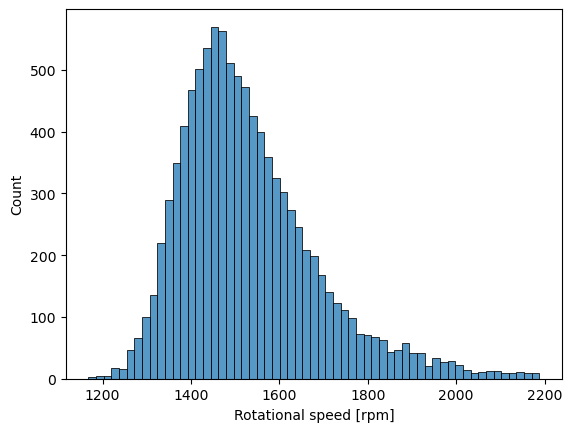

In [510]:
fix, ax = plt.subplots()
sns.histplot(df['Rotational speed [rpm]'], ax=ax)

In [511]:
df['Rotational speed [rpm]'].isnull().sum()

100

In [512]:
median = df['Rotational speed [rpm]'].median()
median

1501.0

<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

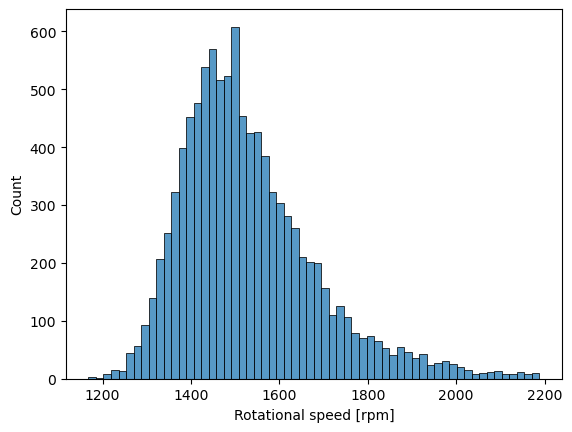

In [513]:
df['Rotational speed [rpm]'].fillna(value=median, inplace=True)
fix, ax = plt.subplots()
sns.histplot(df['Rotational speed [rpm]'], ax=ax)

## Torque

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

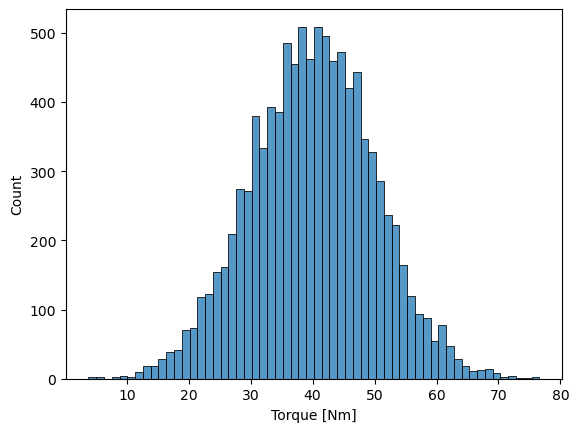

In [514]:
fix, ax = plt.subplots()
sns.histplot(df['Torque [Nm]'], ax=ax)

In [515]:
df['Torque [Nm]'].mean()

39.986909999999995

In [516]:
df['Torque [Nm]'].std()

9.968933725121401

In [517]:
Q1 = df['Torque [Nm]'].quantile(0.25)
Q1

33.2

In [518]:
Q3 = df['Torque [Nm]'].quantile(0.75)
Q3

46.8

In [519]:
IQR = q3 - q1
IQR

13.599999999999994

In [520]:
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

In [521]:
df['Torque [Nm]'] = df['Torque [Nm]'].map(lambda x: x if (x > lower_bound) & (x < upper_bound) else np.nan)

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

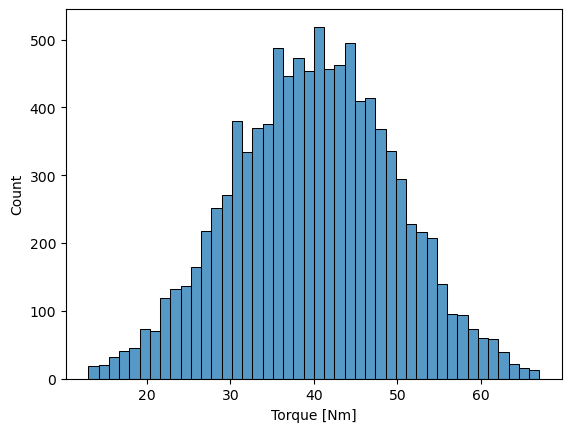

In [522]:
fix, ax = plt.subplots()
sns.histplot(df['Torque [Nm]'], ax=ax)

In [523]:
df['Torque [Nm]'].isnull().sum()

69

In [524]:
mean = df['Torque [Nm]'].mean()
mean

39.94776961031115

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

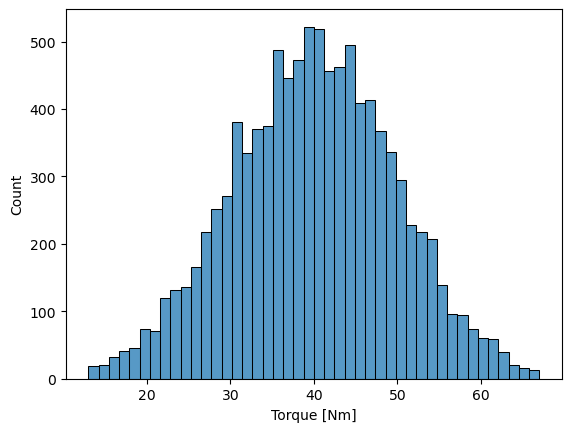

In [525]:
df['Torque [Nm]'].fillna(value=mean, inplace=True)
fix, ax = plt.subplots()
sns.histplot(df['Torque [Nm]'], ax=ax)

In [526]:
df['Torque [Nm]'].fillna(mean)

timestamp
2023-01-01 00:00:00    42.8
2023-01-01 01:00:00    46.3
2023-01-01 02:00:00    49.4
2023-01-01 03:00:00    39.5
2023-01-01 04:00:00    40.0
                       ... 
2024-02-21 11:00:00    29.5
2024-02-21 12:00:00    31.8
2024-02-21 13:00:00    33.4
2024-02-21 14:00:00    48.5
2024-02-21 15:00:00    40.2
Name: Torque [Nm], Length: 10000, dtype: float64

<Axes: xlabel='timestamp', ylabel='Machine failure'>

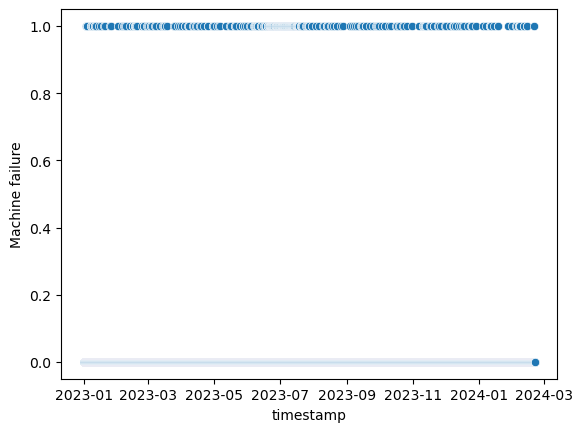

In [527]:
fix, ax = plt.subplots()
sns.scatterplot(df['Machine failure'])

In [528]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

# ML Model Training

In [529]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')

In [530]:
df.columns = ['type', 'air_temperature', 'process_temperature', 'rotational_speed', 'torque', 'tool_wear', 'failure']

In [531]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [532]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

In [533]:
def convert_type_to_label(row):
    type_val = row
    
    if type_val == 'M':
        return 0
    elif type_val == 'L':
        return 1
    elif type_val == 'H':
        return 2
    else:
        return -1

In [534]:
df['type'] = df['type'].apply(lambda x: convert_type_to_label(x))
df['type'].unique()

[0, 1, 2]
Categories (3, int64): [2, 1, 0]

In [535]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [536]:
pipeline = Pipeline(steps=[
    ('encoding', ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['type'])])),
    ('scaling', StandardScaler())
])

X_train_modified = pipeline.fit_transform(X_train)

In [537]:
# Since data is imbalanced, we will do over + under sampling
from imblearn.over_sampling import SVMSMOTE

over_sampling = SVMSMOTE(random_state=42)

In [538]:
X_train.isnull().sum()

type                   0
air_temperature        0
process_temperature    0
rotational_speed       0
torque                 0
tool_wear              0
dtype: int64

In [539]:
X_train_sampled, y_train_sampled = over_sampling.fit_resample(X_train_modified, y_train)

## Training Models 

In [540]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [548]:
params_grid = {
    'max_depth': [2, 5, 8, 10],
    'criterion': ["gini", "entropy", "log_loss"]
}


rfc = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=100, bootstrap=True)

cv = GridSearchCV(estimator=rfc, param_grid=params_grid, n_jobs=-1)
cv.fit(X_train_sampled, y_train_sampled)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 8, 10]})

In [549]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [550]:
best_model = cv.best_estimator_
best_model

RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=0)

In [555]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report

In [556]:
y_predicted = best_model.predict(pipeline.transform(X_test))

In [557]:
accuracy_score(y_test, y_predicted)

0.966

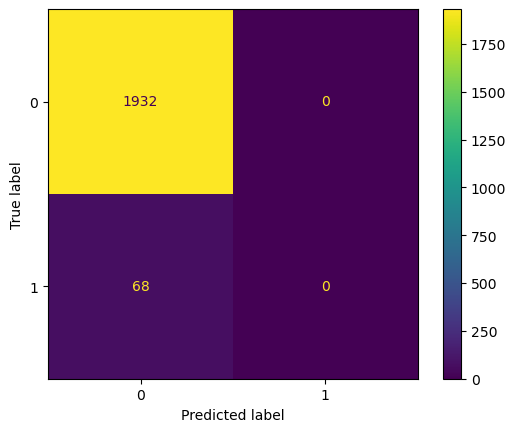

In [558]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predicted)).plot()

In [560]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.00      0.00      0.00        68

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/Users/harshitgajjar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitgajjar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitgajjar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
